In [10]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from datetime import datetime

In [11]:
data = "Data/ad_viz_plotval_data.csv"

In [12]:
data = pd.read_csv(data)
#Removing first column (index)
data.drop(['Site ID', 'POC', 'SITE_LATITUDE', 'SITE_LONGITUDE', 'STATE_CODE', 'CBSA_CODE', 'Source','DAILY_OBS_COUNT',
           'PERCENT_COMPLETE','AQS_PARAMETER_CODE', 'AQS_PARAMETER_DESC'],axis=1,inplace=True)

In [13]:
data

,Date,Daily Mean PM2.5 Concentration,UNITS,DAILY_AQI_VALUE,Site Name,CBSA_NAME,STATE,COUNTY_CODE,COUNTY
0,01/01/2020,1.9,ug/m3 LC,8,ALBANY COUNTY HEALTH DEPT,"Albany-Schenectady-Troy, NY",New York,1,Albany
1,01/01/2020,4.1,ug/m3 LC,17,ALBANY COUNTY HEALTH DEPT,"Albany-Schenectady-Troy, NY",New York,1,Albany
2,01/02/2020,9.1,ug/m3 LC,38,ALBANY COUNTY HEALTH DEPT,"Albany-Schenectady-Troy, NY",New York,1,Albany
3,01/03/2020,13.4,ug/m3 LC,54,ALBANY COUNTY HEALTH DEPT,"Albany-Schenectady-Troy, NY",New York,1,Albany
4,01/04/2020,12.9,ug/m3 LC,53,ALBANY COUNTY HEALTH DEPT,"Albany-Schenectady-Troy, NY",New York,1,Albany
...,...,...,...,...,...,...,...,...,...
1295,01/27/2020,6.0,ug/m3 LC,25,WHITE PLAINS,"New York-Newark-Jersey City, NY-NJ-PA",New York,119,Westchester
1296,01/28/2020,4.7,ug/m3 LC,20,WHITE PLAINS,"New York-Newark-Jersey City, NY-NJ-PA",New York,119,Westchester
1297,01/29/2020,5.3,ug/m3 LC,22,WHITE PLAINS,"New York-Newark-Jersey City, NY-NJ-PA",New York,119,Westchester
1298,01/30/2020,6.8,ug/m3 LC,28,WHITE PLAINS,"New York-Newark-Jersey City, NY-NJ-PA",New York,119,Westchester


Notes:
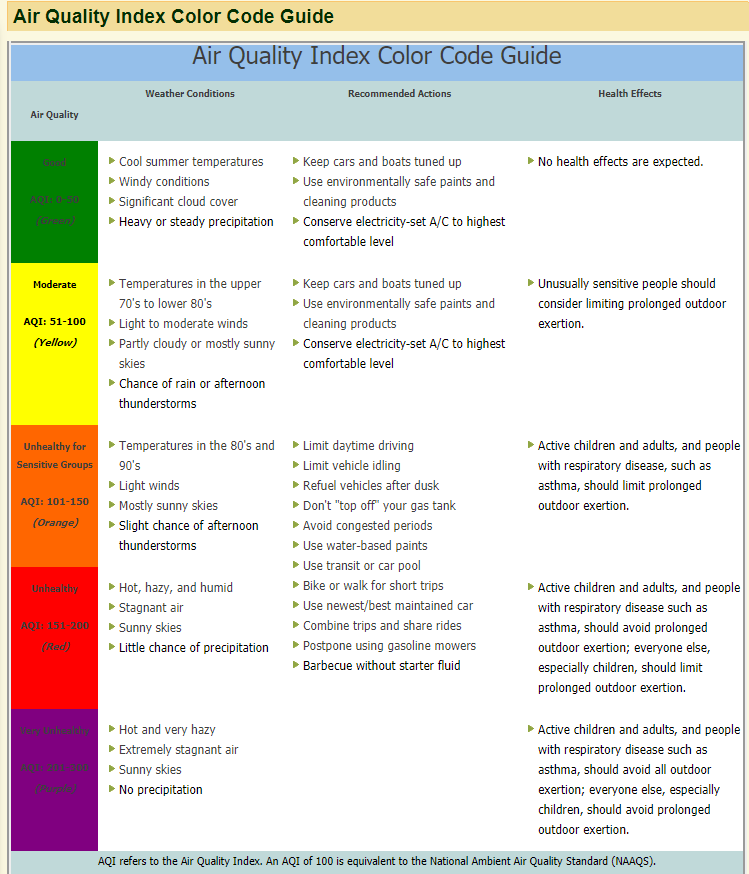

In [14]:
# # data.head(50)
# data.loc[data['Date'] == '01/01/2020']
data2 = pd.DataFrame()

data2['Average DAILY_AQI_VALUE'] = data.groupby(['Date','COUNTY'])['DAILY_AQI_VALUE'].mean()
# aqi_df = data.groupby(['Date','COUNTY']).mean()['DAILY_AQI_VALUE']
# data['DAILY_AQI_VALUE'] = data.groupby('Date')['COUNTY'].mean()


In [15]:
data2.to_cv

AttributeError: 'DataFrame' object has no attribute 'to_cv'

In [16]:
data.loc[(data['Date'] == '01/01/2020') & (data['COUNTY'] == 'Albany')]

,Date,Daily Mean PM2.5 Concentration,UNITS,DAILY_AQI_VALUE,Site Name,CBSA_NAME,STATE,COUNTY_CODE,COUNTY
0,01/01/2020,1.9,ug/m3 LC,8,ALBANY COUNTY HEALTH DEPT,"Albany-Schenectady-Troy, NY",New York,1,Albany
1,01/01/2020,4.1,ug/m3 LC,17,ALBANY COUNTY HEALTH DEPT,"Albany-Schenectady-Troy, NY",New York,1,Albany
85,01/01/2020,1.9,ug/m3 LC,8,LOUDONVILLE,"Albany-Schenectady-Troy, NY",New York,1,Albany


In [17]:
data.head()

,Date,Daily Mean PM2.5 Concentration,UNITS,DAILY_AQI_VALUE,Site Name,CBSA_NAME,STATE,COUNTY_CODE,COUNTY
0,01/01/2020,1.9,ug/m3 LC,8,ALBANY COUNTY HEALTH DEPT,"Albany-Schenectady-Troy, NY",New York,1,Albany
1,01/01/2020,4.1,ug/m3 LC,17,ALBANY COUNTY HEALTH DEPT,"Albany-Schenectady-Troy, NY",New York,1,Albany
2,01/02/2020,9.1,ug/m3 LC,38,ALBANY COUNTY HEALTH DEPT,"Albany-Schenectady-Troy, NY",New York,1,Albany
3,01/03/2020,13.4,ug/m3 LC,54,ALBANY COUNTY HEALTH DEPT,"Albany-Schenectady-Troy, NY",New York,1,Albany
4,01/04/2020,12.9,ug/m3 LC,53,ALBANY COUNTY HEALTH DEPT,"Albany-Schenectady-Troy, NY",New York,1,Albany


In [18]:
data = data.rename(columns={'Date': 'date'})

In [19]:
data_csvpath = "Data/covid-19-data-master/us-counties.csv"

In [20]:
us_data = pd.read_csv(data_csvpath)
us_data

,date,county,state,fips,cases,deaths
0,2020-01-21,Snohomish,Washington,53061.0,1,0
1,2020-01-22,Snohomish,Washington,53061.0,1,0
2,2020-01-23,Snohomish,Washington,53061.0,1,0
3,2020-01-24,Cook,Illinois,17031.0,1,0
4,2020-01-24,Snohomish,Washington,53061.0,1,0
...,...,...,...,...,...,...
14042,2020-03-26,Natrona,Wyoming,56025.0,6,0
14043,2020-03-26,Park,Wyoming,56029.0,1,0
14044,2020-03-26,Sheridan,Wyoming,56033.0,4,0
14045,2020-03-26,Sweetwater,Wyoming,56037.0,1,0


In [22]:
type(us_data['date'][0])

str

In [23]:
oldformat = '2020-03-28'

In [24]:
datetime.strptime(oldformat, '%Y-%m-%d').strftime('%m/%d/%Y')

'03/28/2020'

In [25]:
oldformat = '2020-03-26'
datetimeobject = datetime.strptime(oldformat, '%Y-%m-%d')

In [26]:
date = []
for i in range(len(us_data['date'])):
    new_date = datetime.strptime(us_data['date'][i], '%Y-%m-%d').strftime('%m/%d/%Y')
    date.append(new_date)
us_data['date2'] = date

droped_date = us_data.drop('date', axis=1)
droped_date

,county,state,fips,cases,deaths,date2
0,Snohomish,Washington,53061.0,1,0,01/21/2020
1,Snohomish,Washington,53061.0,1,0,01/22/2020
2,Snohomish,Washington,53061.0,1,0,01/23/2020
3,Cook,Illinois,17031.0,1,0,01/24/2020
4,Snohomish,Washington,53061.0,1,0,01/24/2020
...,...,...,...,...,...,...
14042,Natrona,Wyoming,56025.0,6,0,03/26/2020
14043,Park,Wyoming,56029.0,1,0,03/26/2020
14044,Sheridan,Wyoming,56033.0,4,0,03/26/2020
14045,Sweetwater,Wyoming,56037.0,1,0,03/26/2020


In [27]:
us_data = droped_date.rename(columns={'date2': 'date'})

In [28]:
us_data = us_data.loc[us_data['state'] == 'New York']
us_data

,county,state,fips,cases,deaths,date
416,New York City,New York,NaN,1,0,03/01/2020
448,New York City,New York,NaN,1,0,03/02/2020
482,New York City,New York,NaN,2,0,03/03/2020
518,New York City,New York,NaN,2,0,03/04/2020
519,Westchester,New York,36119.0,9,0,03/04/2020
...,...,...,...,...,...,...
13403,Warren,New York,36113.0,2,0,03/26/2020
13404,Washington,New York,36115.0,4,0,03/26/2020
13405,Wayne,New York,36117.0,8,0,03/26/2020
13406,Westchester,New York,36119.0,5944,8,03/26/2020


In [29]:
us_data.to_csv('Data/ny-counties.csv', index= False)

In [30]:
data

,date,Daily Mean PM2.5 Concentration,UNITS,DAILY_AQI_VALUE,Site Name,CBSA_NAME,STATE,COUNTY_CODE,COUNTY
0,01/01/2020,1.9,ug/m3 LC,8,ALBANY COUNTY HEALTH DEPT,"Albany-Schenectady-Troy, NY",New York,1,Albany
1,01/01/2020,4.1,ug/m3 LC,17,ALBANY COUNTY HEALTH DEPT,"Albany-Schenectady-Troy, NY",New York,1,Albany
2,01/02/2020,9.1,ug/m3 LC,38,ALBANY COUNTY HEALTH DEPT,"Albany-Schenectady-Troy, NY",New York,1,Albany
3,01/03/2020,13.4,ug/m3 LC,54,ALBANY COUNTY HEALTH DEPT,"Albany-Schenectady-Troy, NY",New York,1,Albany
4,01/04/2020,12.9,ug/m3 LC,53,ALBANY COUNTY HEALTH DEPT,"Albany-Schenectady-Troy, NY",New York,1,Albany
...,...,...,...,...,...,...,...,...,...
1295,01/27/2020,6.0,ug/m3 LC,25,WHITE PLAINS,"New York-Newark-Jersey City, NY-NJ-PA",New York,119,Westchester
1296,01/28/2020,4.7,ug/m3 LC,20,WHITE PLAINS,"New York-Newark-Jersey City, NY-NJ-PA",New York,119,Westchester
1297,01/29/2020,5.3,ug/m3 LC,22,WHITE PLAINS,"New York-Newark-Jersey City, NY-NJ-PA",New York,119,Westchester
1298,01/30/2020,6.8,ug/m3 LC,28,WHITE PLAINS,"New York-Newark-Jersey City, NY-NJ-PA",New York,119,Westchester


In [31]:
merged_df = pd.merge(us_data, data, on='date', how='inner')
merged_df

,county,state,fips,cases,deaths,date,Daily Mean PM2.5 Concentration,UNITS,DAILY_AQI_VALUE,Site Name,CBSA_NAME,STATE,COUNTY_CODE,COUNTY
0,New York City,New York,NaN,1,0,03/01/2020,5.6,ug/m3 LC,23,ALBANY COUNTY HEALTH DEPT,"Albany-Schenectady-Troy, NY",New York,1,Albany
1,New York City,New York,NaN,1,0,03/01/2020,6.8,ug/m3 LC,28,Buffalo Near-Road,"Buffalo-Cheektowaga-Niagara Falls, NY",New York,29,Erie
2,New York City,New York,NaN,1,0,03/01/2020,-1.7,ug/m3 LC,0,WHITEFACE BASE,NaN,New York,31,Essex
3,New York City,New York,NaN,1,0,03/01/2020,8.0,ug/m3 LC,33,Rochester Near-Road,"Rochester, NY",New York,55,Monroe
4,New York City,New York,NaN,1,0,03/01/2020,6.1,ug/m3 LC,25,ROCHESTER 2,"Rochester, NY",New York,55,Monroe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4556,Wyoming,New York,36121.0,7,0,03/26/2020,5.4,ug/m3 LC,23,Rochester Near-Road,"Rochester, NY",New York,55,Monroe
4557,Wyoming,New York,36121.0,7,0,03/26/2020,5.9,ug/m3 LC,25,ROCHESTER 2,"Rochester, NY",New York,55,Monroe
4558,Wyoming,New York,36121.0,7,0,03/26/2020,5.0,ug/m3 LC,21,QUEENS COLLEGE 2,"New York-Newark-Jersey City, NY-NJ-PA",New York,81,Queens
4559,Wyoming,New York,36121.0,7,0,03/26/2020,6.6,ug/m3 LC,28,Queens College Near Road,"New York-Newark-Jersey City, NY-NJ-PA",New York,81,Queens


In [32]:
us_data = merged_df.rename(columns={'COUNTY_CODE': 'FIPS Code'})

In [33]:
us_data

,county,state,fips,cases,deaths,date,Daily Mean PM2.5 Concentration,UNITS,DAILY_AQI_VALUE,Site Name,CBSA_NAME,STATE,FIPS Code,COUNTY
0,New York City,New York,NaN,1,0,03/01/2020,5.6,ug/m3 LC,23,ALBANY COUNTY HEALTH DEPT,"Albany-Schenectady-Troy, NY",New York,1,Albany
1,New York City,New York,NaN,1,0,03/01/2020,6.8,ug/m3 LC,28,Buffalo Near-Road,"Buffalo-Cheektowaga-Niagara Falls, NY",New York,29,Erie
2,New York City,New York,NaN,1,0,03/01/2020,-1.7,ug/m3 LC,0,WHITEFACE BASE,NaN,New York,31,Essex
3,New York City,New York,NaN,1,0,03/01/2020,8.0,ug/m3 LC,33,Rochester Near-Road,"Rochester, NY",New York,55,Monroe
4,New York City,New York,NaN,1,0,03/01/2020,6.1,ug/m3 LC,25,ROCHESTER 2,"Rochester, NY",New York,55,Monroe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4556,Wyoming,New York,36121.0,7,0,03/26/2020,5.4,ug/m3 LC,23,Rochester Near-Road,"Rochester, NY",New York,55,Monroe
4557,Wyoming,New York,36121.0,7,0,03/26/2020,5.9,ug/m3 LC,25,ROCHESTER 2,"Rochester, NY",New York,55,Monroe
4558,Wyoming,New York,36121.0,7,0,03/26/2020,5.0,ug/m3 LC,21,QUEENS COLLEGE 2,"New York-Newark-Jersey City, NY-NJ-PA",New York,81,Queens
4559,Wyoming,New York,36121.0,7,0,03/26/2020,6.6,ug/m3 LC,28,Queens College Near Road,"New York-Newark-Jersey City, NY-NJ-PA",New York,81,Queens


In [ ]:
#Scrape Wiki

In [3]:
import pandas as pd

In [4]:
url ='https://simple.wikipedia.org/wiki/List_of_counties_in_New_York'

In [5]:
tables = pd.read_html(url)
tables

[                County  FIPS Code[1]  \
 0        Albany County             1   
 1      Allegany County             3   
 2         Bronx County             5   
 3        Broome County             7   
 4   Cattaraugus County             9   
 ..                 ...           ...   
 57   Washington County           115   
 58        Wayne County           117   
 59  Westchester County           119   
 60      Wyoming County           121   
 61        Yates County           123   
 
                                County Seat[2] Created[2]  \
 0                                      Albany       1683   
 1                                     Belmont       1806   
 2   New York City (coextensive withThe Bronx)    1914[5]   
 3                                  Binghamton       1806   
 4                               Little Valley       1808   
 ..                                        ...        ...   
 57                                Fort Edward       1772   
 58               

In [6]:
type (tables)

list

In [7]:
Newyork_df = tables[0]
Newyork_df.columns = ['County', 'FIPS Code', 'County Seat', 'Created', 'Formed from', 'Named for','Density', '2010 Population', 'Area', 'Map']
Newyork_df.head()

,County,FIPS Code,County Seat,Created,Formed from,Named for,Density,2010 Population,Area,Map
0,Albany County,1,Albany,1683,One of 12 original counties created in the New...,James II of England (James VII of Scotland) (1...,570.74,NaN,(2),NaN
1,Allegany County,3,Belmont,1806,Genesee County,A variant spelling of the Allegheny River,47.34,NaN,(2),NaN
2,Bronx County,5,New York City (coextensive withThe Bronx),1914[5],New York County,"Jonas Bronck (1600?–1643), an early settler of...",24118.20,NaN,(2),NaN
3,Broome County,7,Binghamton,1806,Tioga County,"John Broome (1738–1810), fourth Lieutenant Gov...",280.56,NaN,(2),NaN
4,Cattaraugus County,9,Little Valley,1808,Genesee County,"A Seneca word meaning ""bad smelling banks"", re...",61.31,NaN,(2),NaN


In [8]:
ny_df = Newyork_df.drop(['Created', 'Formed from', 'Named for', 'Area', 'Map'], axis = 1)
ny_df

,County,FIPS Code,County Seat,Density,2010 Population
0,Albany County,1,Albany,570.74,NaN
1,Allegany County,3,Belmont,47.34,NaN
2,Bronx County,5,New York City (coextensive withThe Bronx),24118.20,NaN
3,Broome County,7,Binghamton,280.56,NaN
4,Cattaraugus County,9,Little Valley,61.31,NaN
...,...,...,...,...,...
57,Washington County,115,Fort Edward,74.72,NaN
58,Wayne County,117,Lyons,67.75,NaN
59,Westchester County,119,White Plains,1898.23,NaN
60,Wyoming County,121,Warsaw,70.73,NaN


In [34]:
final_df = pd.merge(us_data, ny_df, on='FIPS Code', how='inner')
final_df

,county,state,fips,cases,deaths,date,Daily Mean PM2.5 Concentration,UNITS,DAILY_AQI_VALUE,Site Name,CBSA_NAME,STATE,FIPS Code,COUNTY,County,County Seat,Density,2010 Population
0,New York City,New York,NaN,1,0,03/01/2020,5.6,ug/m3 LC,23,ALBANY COUNTY HEALTH DEPT,"Albany-Schenectady-Troy, NY",New York,1,Albany,Albany County,Albany,570.74,NaN
1,New York City,New York,NaN,1,0,03/02/2020,10.1,ug/m3 LC,42,ALBANY COUNTY HEALTH DEPT,"Albany-Schenectady-Troy, NY",New York,1,Albany,Albany County,Albany,570.74,NaN
2,New York City,New York,NaN,2,0,03/03/2020,13.8,ug/m3 LC,55,ALBANY COUNTY HEALTH DEPT,"Albany-Schenectady-Troy, NY",New York,1,Albany,Albany County,Albany,570.74,NaN
3,New York City,New York,NaN,2,0,03/04/2020,7.4,ug/m3 LC,31,ALBANY COUNTY HEALTH DEPT,"Albany-Schenectady-Troy, NY",New York,1,Albany,Albany County,Albany,570.74,NaN
4,Westchester,New York,36119.0,9,0,03/04/2020,7.4,ug/m3 LC,31,ALBANY COUNTY HEALTH DEPT,"Albany-Schenectady-Troy, NY",New York,1,Albany,Albany County,Albany,570.74,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4556,Warren,New York,36113.0,2,0,03/26/2020,5.1,ug/m3 LC,21,PINNACLE STATE PARK,"Corning, NY",New York,101,Steuben,Steuben County,Bath,70.51,NaN
4557,Washington,New York,36115.0,4,0,03/26/2020,5.1,ug/m3 LC,21,PINNACLE STATE PARK,"Corning, NY",New York,101,Steuben,Steuben County,Bath,70.51,NaN
4558,Wayne,New York,36117.0,8,0,03/26/2020,5.1,ug/m3 LC,21,PINNACLE STATE PARK,"Corning, NY",New York,101,Steuben,Steuben County,Bath,70.51,NaN
4559,Westchester,New York,36119.0,5944,8,03/26/2020,5.1,ug/m3 LC,21,PINNACLE STATE PARK,"Corning, NY",New York,101,Steuben,Steuben County,Bath,70.51,NaN
